<a href="https://colab.research.google.com/github/Koyelisha/Machine-Learning/blob/main/Used_car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [ ]:
df = pd.read_csv('/content/Car_Raw_Data.csv')
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [ ]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
df.drop('Model',axis=1,inplace=True)
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [ ]:
#Removing the missing datas
df.dropna(axis=0,inplace=True)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


Probability Distribution of Car price

Text(0.5, 1.0, 'Car Price Distribution')

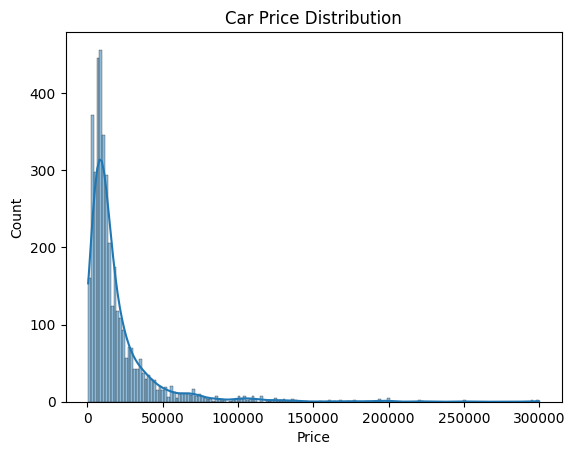

In [ ]:
sns.histplot(df['Price'],kde=True)
plt.title('Car Price Distribution')

In [ ]:
q = df['Price'].quantile(0.99)
q

129812.51999999981

In [ ]:
car_1 = df[df['Price']<q]
car_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


Text(0.5, 1.0, 'Before removing the outliers')

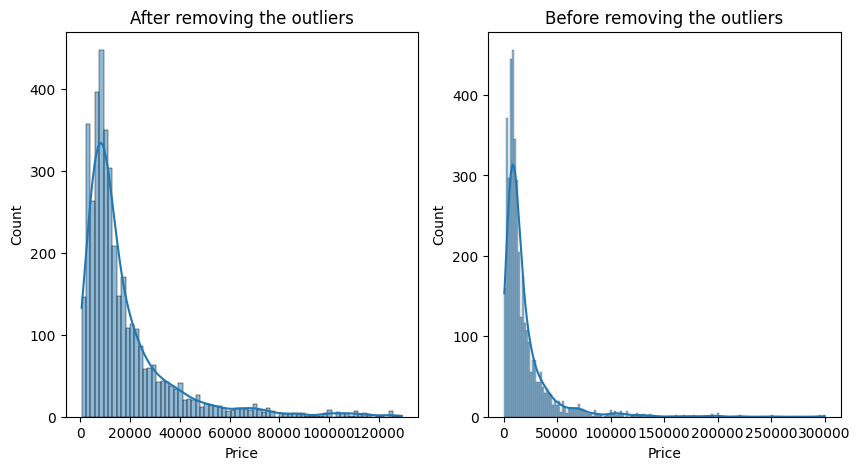

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(car_1['Price'],kde=True)
plt.title('After removing the outliers')

plt.subplot(1,2,2)
sns.histplot(df['Price'],kde=True)
plt.title('Before removing the outliers')

**The similar issue we have with other columns like Mileage,EngineV and Year**

<Axes: xlabel='Year', ylabel='Count'>

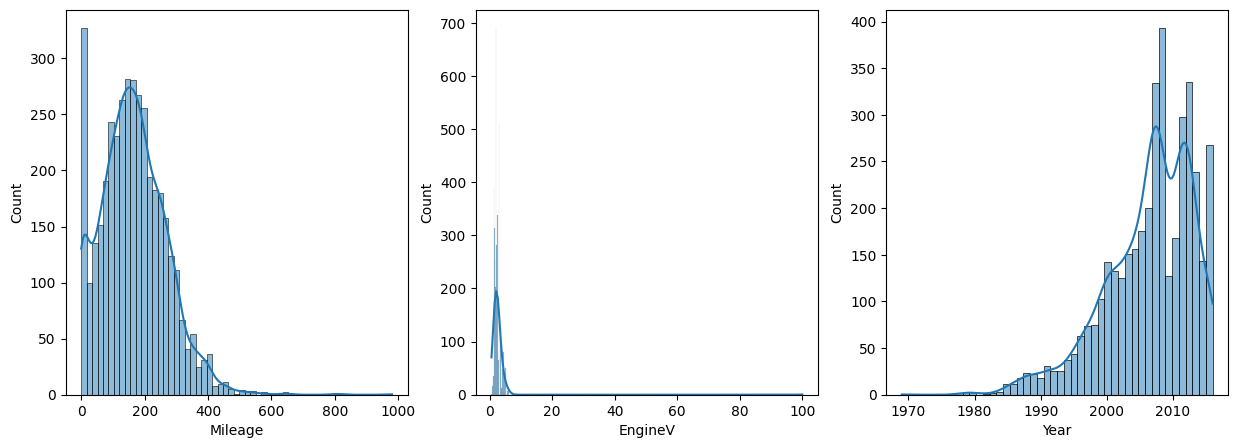

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(car_1['Mileage'],kde=True)

plt.subplot(1,3,2)
sns.histplot(car_1['EngineV'],kde=True)

plt.subplot(1,3,3)
sns.histplot(car_1['Year'],kde=True)

In [ ]:
#Cleaning the outliers from the Mileage column
q1 = car_1['Mileage'].quantile(0.99)
car_2 = car_1[car_1['Mileage']<q1]

Text(0.5, 1.0, 'Before removing the outliers')

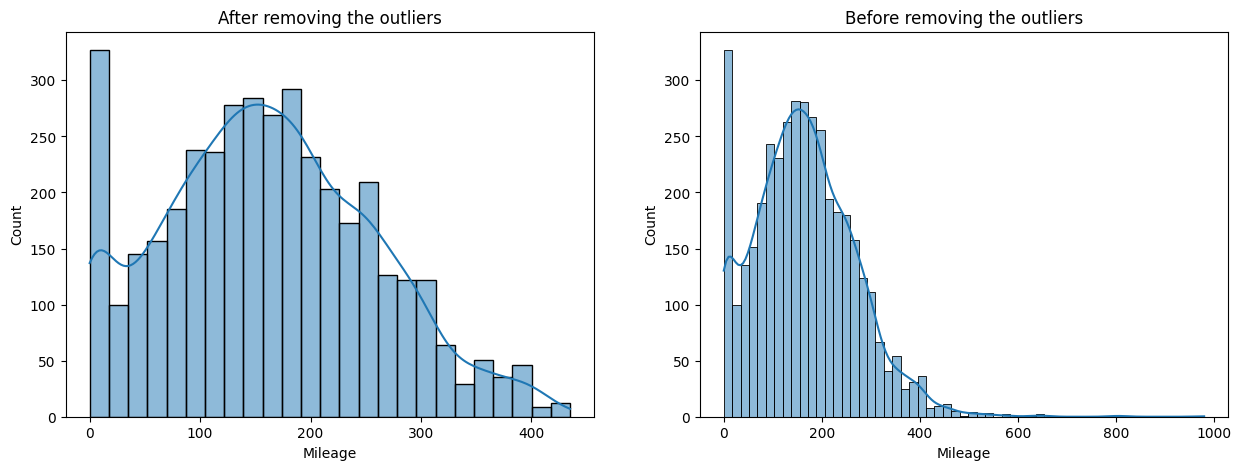

In [ ]:
#Comparing the datas of Mileage
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(car_2['Mileage'],kde=True)
plt.title('After removing the outliers')

plt.subplot(1,2,2)
sns.histplot(car_1['Mileage'],kde=True)
plt.title('Before removing the outliers')

In [ ]:
#Cleaning the outliers from the EngineV column
q2 = car_1['EngineV'].quantile(0.99)
car_3 = car_2[car_2['EngineV']<6.5]
car_3.describe()

,Price,Mileage,EngineV,Year
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,17988.421311,161.279776,2.443497,2006.406019
std,19041.658686,96.068269,0.946198,6.595871
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


Text(0.5, 1.0, 'Before removing the outliers')

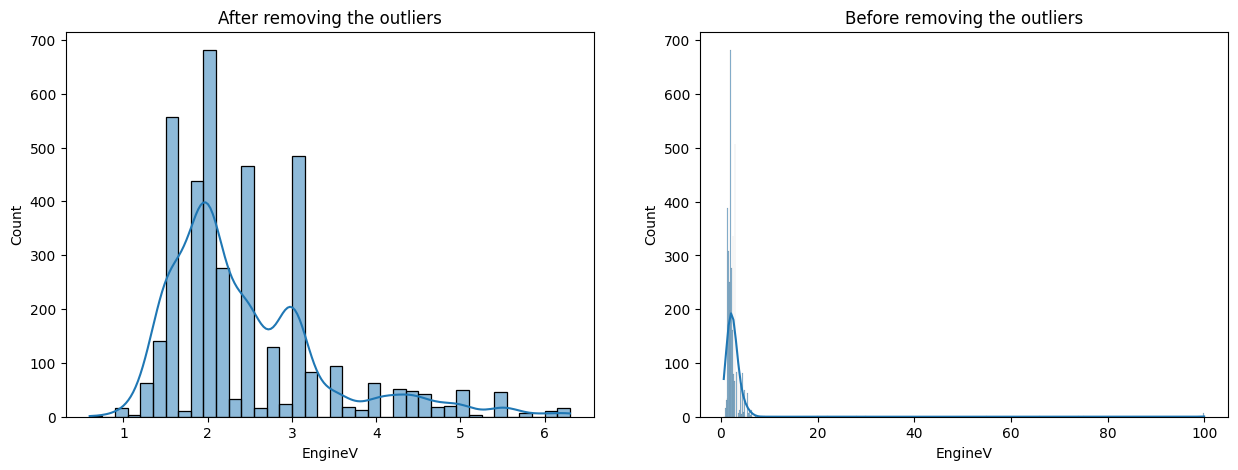

In [ ]:
#Comparing the datas of EngineV
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(car_3['EngineV'],kde=True)
plt.title('After removing the outliers')

plt.subplot(1,2,2)
sns.histplot(car_2['EngineV'],kde=True)
plt.title('Before removing the outliers')

In [ ]:
#Cleaning the outliers from the Year column
q3 = car_3['Year'].quantile(0.01)
q3
car_4 = car_3[car_3['Year']>q3]
car_4.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


Text(0.5, 1.0, 'Before removing the outliers')

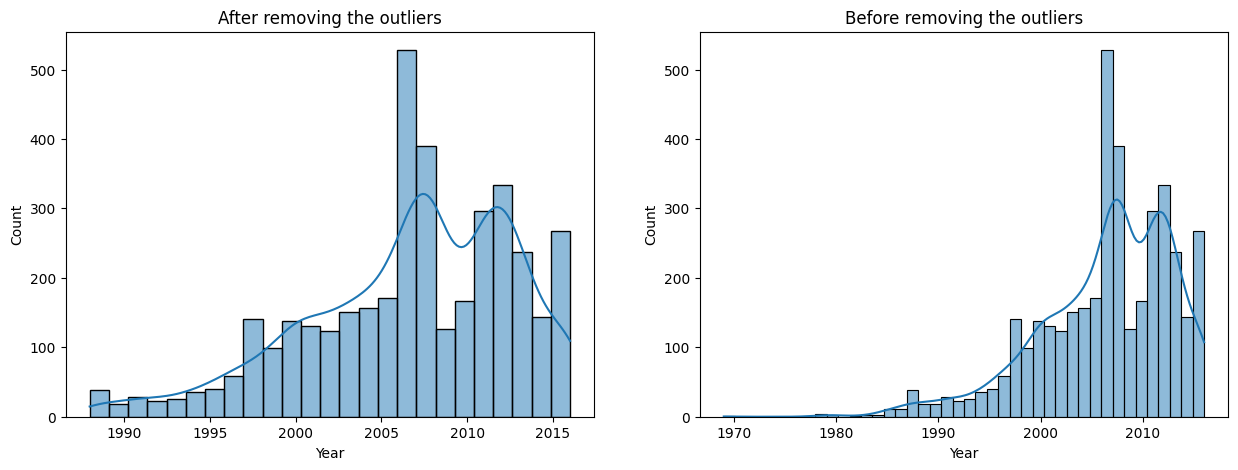

In [ ]:
#Comparing the datas of Year
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(car_4['Year'],kde=True)
plt.title('After removing the outliers')

plt.subplot(1,2,2)
sns.histplot(car_3['Year'],kde=True)
plt.title('Before removing the outliers')

In [ ]:
car_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [ ]:
df.shape[0] - car_4.shape[0]

158

In [ ]:
car_4.to_csv('Cleaned_car_data.csv',index=False)
print('Data Saved')

Data Saved


In [ ]:
clean_data = car_4.copy()
clean_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


Text(0.5, 1.0, 'EngineV vs Price')

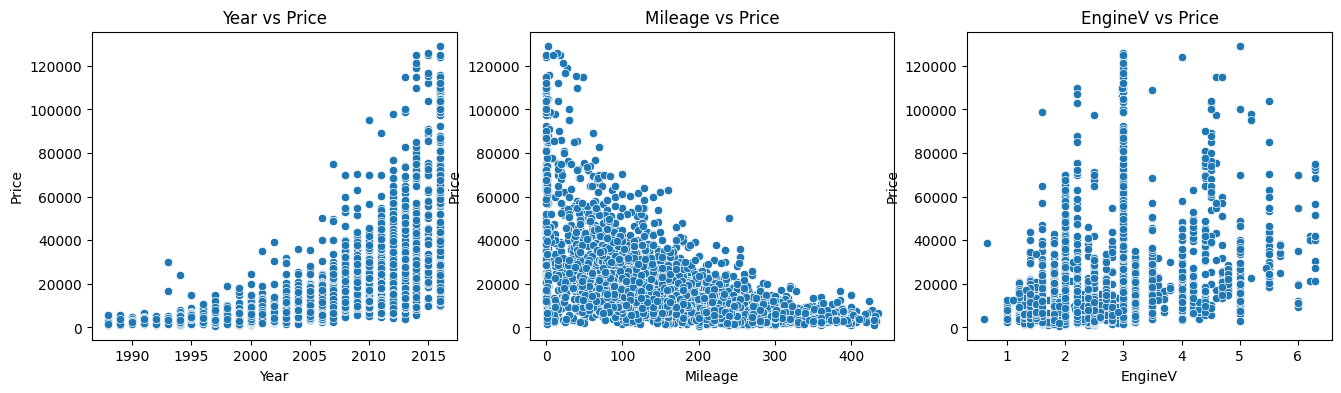

In [ ]:
#Plotting all the three numerical columns
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x=clean_data['Year'],y=clean_data['Price'])
plt.title('Year vs Price')

plt.subplot(1,3,2)
sns.scatterplot(x=clean_data['Mileage'],y=clean_data['Price'])
plt.title('Mileage vs Price')

plt.subplot(1,3,3)
sns.scatterplot(x=clean_data['EngineV'],y=clean_data['Price'])
plt.title('EngineV vs Price')

Text(0.5, 1.0, 'Distribution of price(Log Normal distribution)')

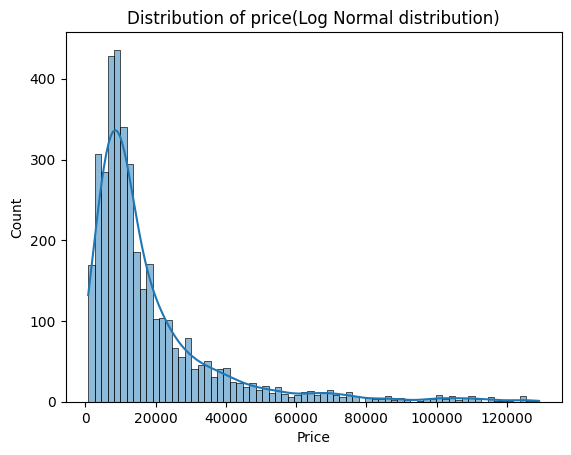

In [36]:
#checking the distribution of price
sns.histplot(clean_data['Price'],kde=True)
plt.title('Distribution of price(Log Normal distribution)')

<Axes: xlabel='Log Price', ylabel='Count'>

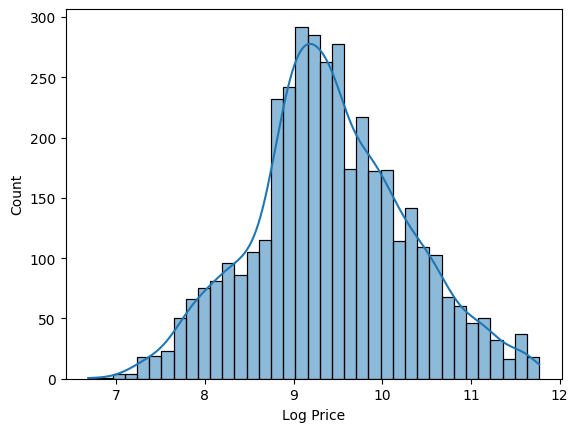

In [38]:
#Log transformation
log_price = np.log(clean_data['Price'])
#Adding another column
clean_data['Log Price'] = log_price
clean_data
sns.histplot(clean_data['Log Price'],kde=True)

Text(0.5, 1.0, 'EngineV vs Log Price')

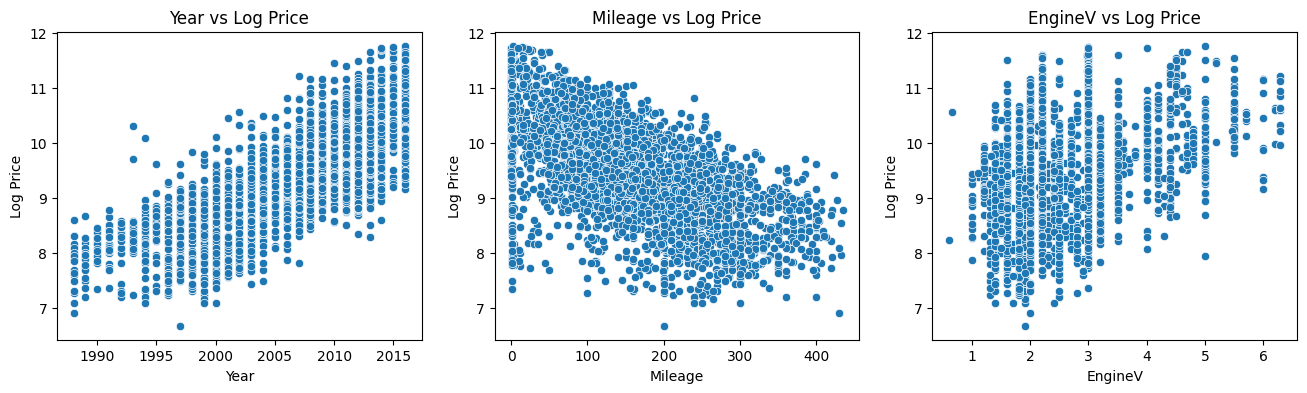

In [41]:
#Plotting all the three numerical columns
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x=clean_data['Year'],y=clean_data['Log Price'])
plt.title('Year vs Log Price')

plt.subplot(1,3,2)
sns.scatterplot(x=clean_data['Mileage'],y=clean_data['Log Price'])
plt.title('Mileage vs Log Price')

plt.subplot(1,3,3)
sns.scatterplot(x=clean_data['EngineV'],y=clean_data['Log Price'])
plt.title('EngineV vs Log Price')

**Checking the multicollinearity**

In [44]:
#importing VIF from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#Taking only numerical columns because other categorical features will be converted into dummy variable
var = clean_data[["Mileage","EngineV","Year"]]
#now var is dataframe
vif_data = pd.DataFrame()
# Adding a new column named as VIF
vif_data["VIF"] = [vif(var.values,i) for i in range(var.shape[1])]
vif_data["Features"] = var.columns
vif_data

,VIF,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


The feature having more VIF value should be removed from the dataset. Generally the feature having VIF value within 1 to 5 are considered to be acceptable.Having higher VIF value leads to high collinearity with other independent features. In this dataset, we can see that the feature "Year" having very high VIF value. So that "Year" must be removed.

In [47]:
#Droping the year column
# clean_data.drop(['Year'],axis=1,inplace=True)
clean_data.drop(['Price'],axis=1,inplace=True)
clean_data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [48]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3867 entries, 0 to 4344
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Body          3867 non-null   object 
 2   Mileage       3867 non-null   int64  
 3   EngineV       3867 non-null   float64
 4   Engine Type   3867 non-null   object 
 5   Registration  3867 non-null   object 
 6   Log Price     3867 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 241.7+ KB


In [73]:
#Getting the dummy columns for categorical datas
car_dum = pd.get_dummies(clean_data,drop_first=True)
car_dum = car_dum.astype(int)
car_dum

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2,9,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2,9,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,35,1,9,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,9,3,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,1,3,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [61]:
non_numeric_cols = car_dum.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')


Checking the multicollinearity of all the columns

In [75]:
vif_df_all = pd.DataFrame()
vif_df_all["VIF"] = [vif(car_dum.values,i) for i in range(car_dum.shape[1])]
vif_df_all["Features"] = car_dum.columns
vif_df_all

,VIF,Features
0,4.329869,Mileage
1,9.201656,EngineV
2,36.216259,Log Price
3,2.591939,Brand_BMW
4,3.058590,Brand_Mercedes-Benz
5,1.812116,Brand_Mitsubishi
6,2.283204,Brand_Renault
7,2.401559,Brand_Toyota
8,3.308884,Brand_Volkswagen
9,1.590091,Body_hatch


In [78]:
#Saving the last processed data for model training
car_dum.to_csv("Clean_car_final_data.csv",index=True)
print("Data Saved")
print("End of the EDA part")

Data Saved
End of the EDA part


In [79]:
car = car_dum.copy()
car

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2,9,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2,9,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,35,1,9,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,9,3,11,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,1,3,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


**Model Training** (Linear Regression)

In [82]:
x = car.drop('Log Price',axis=1)
y = car['Log Price']
y

0        8
1        8
2        9
3       10
4        9
        ..
4338     9
4339     9
4340    11
4341     8
4344     9
Name: Log Price, Length: 3867, dtype: int64

In [84]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.2179077 , -0.09726593,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201, -0.09726593, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.78125977, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.86224264, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  0.86224264,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.09726593, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [120]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=32)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3093, 17), (3093,), (774, 17), (774,))

In [113]:
#Regression
linear_regression = LinearRegression()
model = linear_regression.fit(x_train,y_train)

In [103]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(linear_regression,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse.mean()

-0.27947714488125475

In [121]:
#Checking the prediction with traing data
y_pred_train = model.predict(x_train)

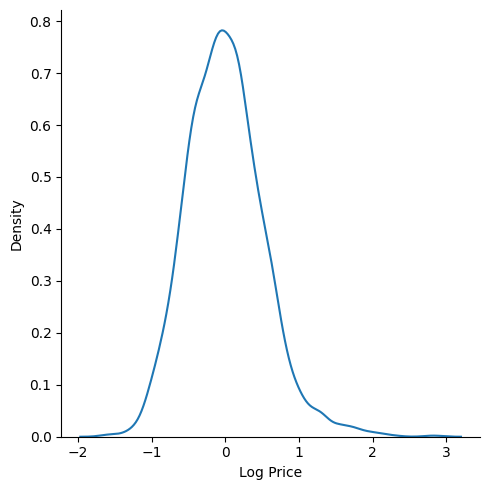

In [125]:
sns.displot(y_pred_train-y_train,kind='kde')

In [138]:
score = r2_score(y_train,y_pred_train)
score

0.6837495926853565